### 데이터 준비까지만 진행합니다.

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [7]:
# sklearn 내장 데이터셋 불러오기
from sklearn.datasets import load_diabetes
data = load_diabetes(as_frame=False, scaled=False)
X = data.data
y = data.target
df = pd.DataFrame(X.copy(), columns=data.feature_names)
df['target'] = pd.Series(y)
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0,178.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0,104.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0,132.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0,220.0


In [8]:
# 학습/테스트 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state=42)
X_train.shape, X_test.shape

((309, 10), (133, 10))

# EDA
1. 히스토그램
2. 박스플롯
3. 상관계수 히트맵
4. (선택) 페어플롯

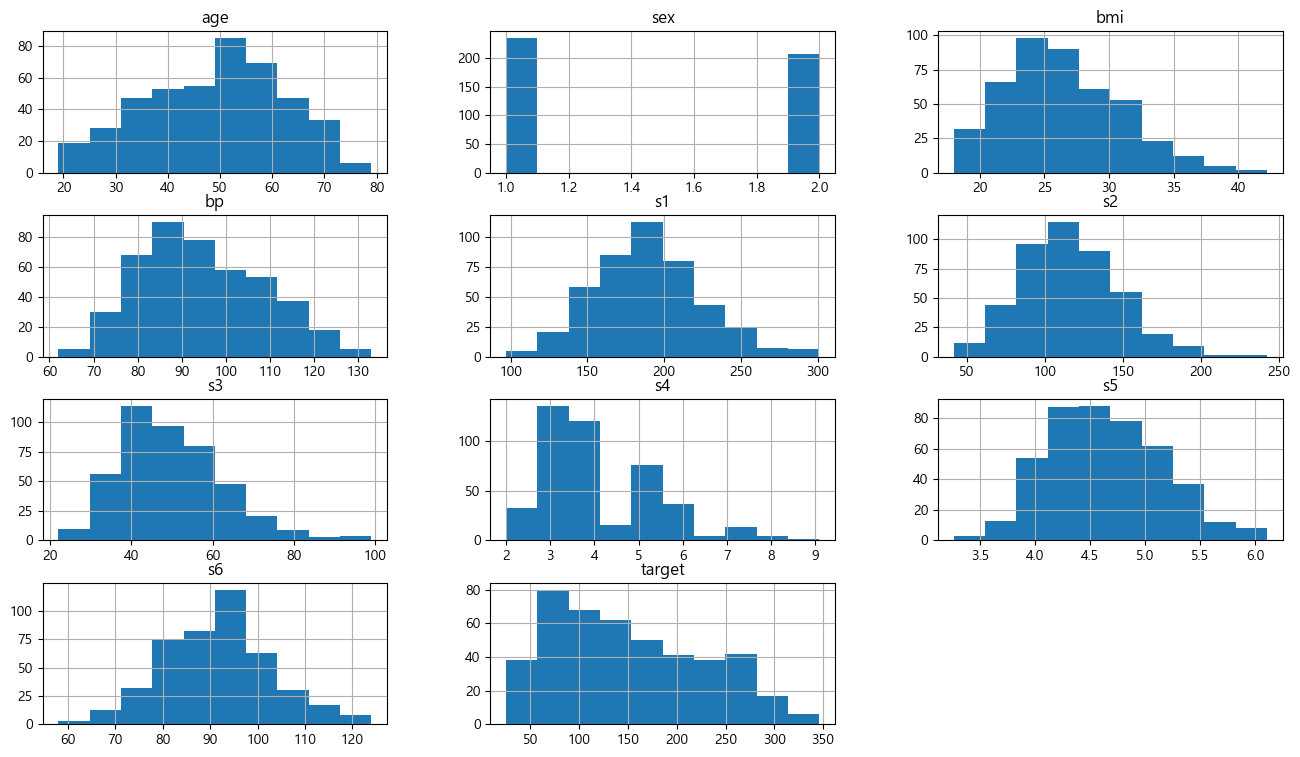

In [11]:
df.hist(figsize=(16,9))
plt.show()

<Axes: >

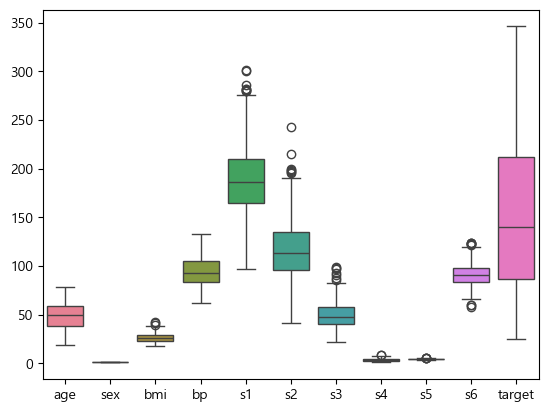

In [12]:
sns.boxplot(data=df)

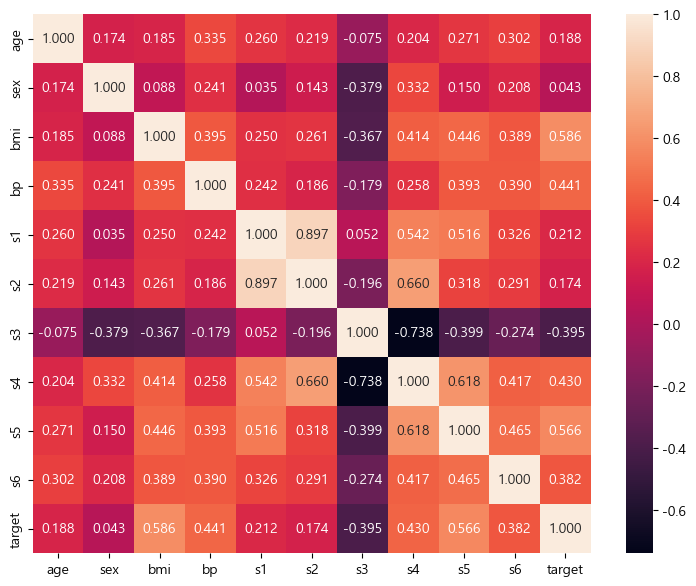

In [40]:
plt.figure(figsize=(9,7))

corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.3f')

plt.show()

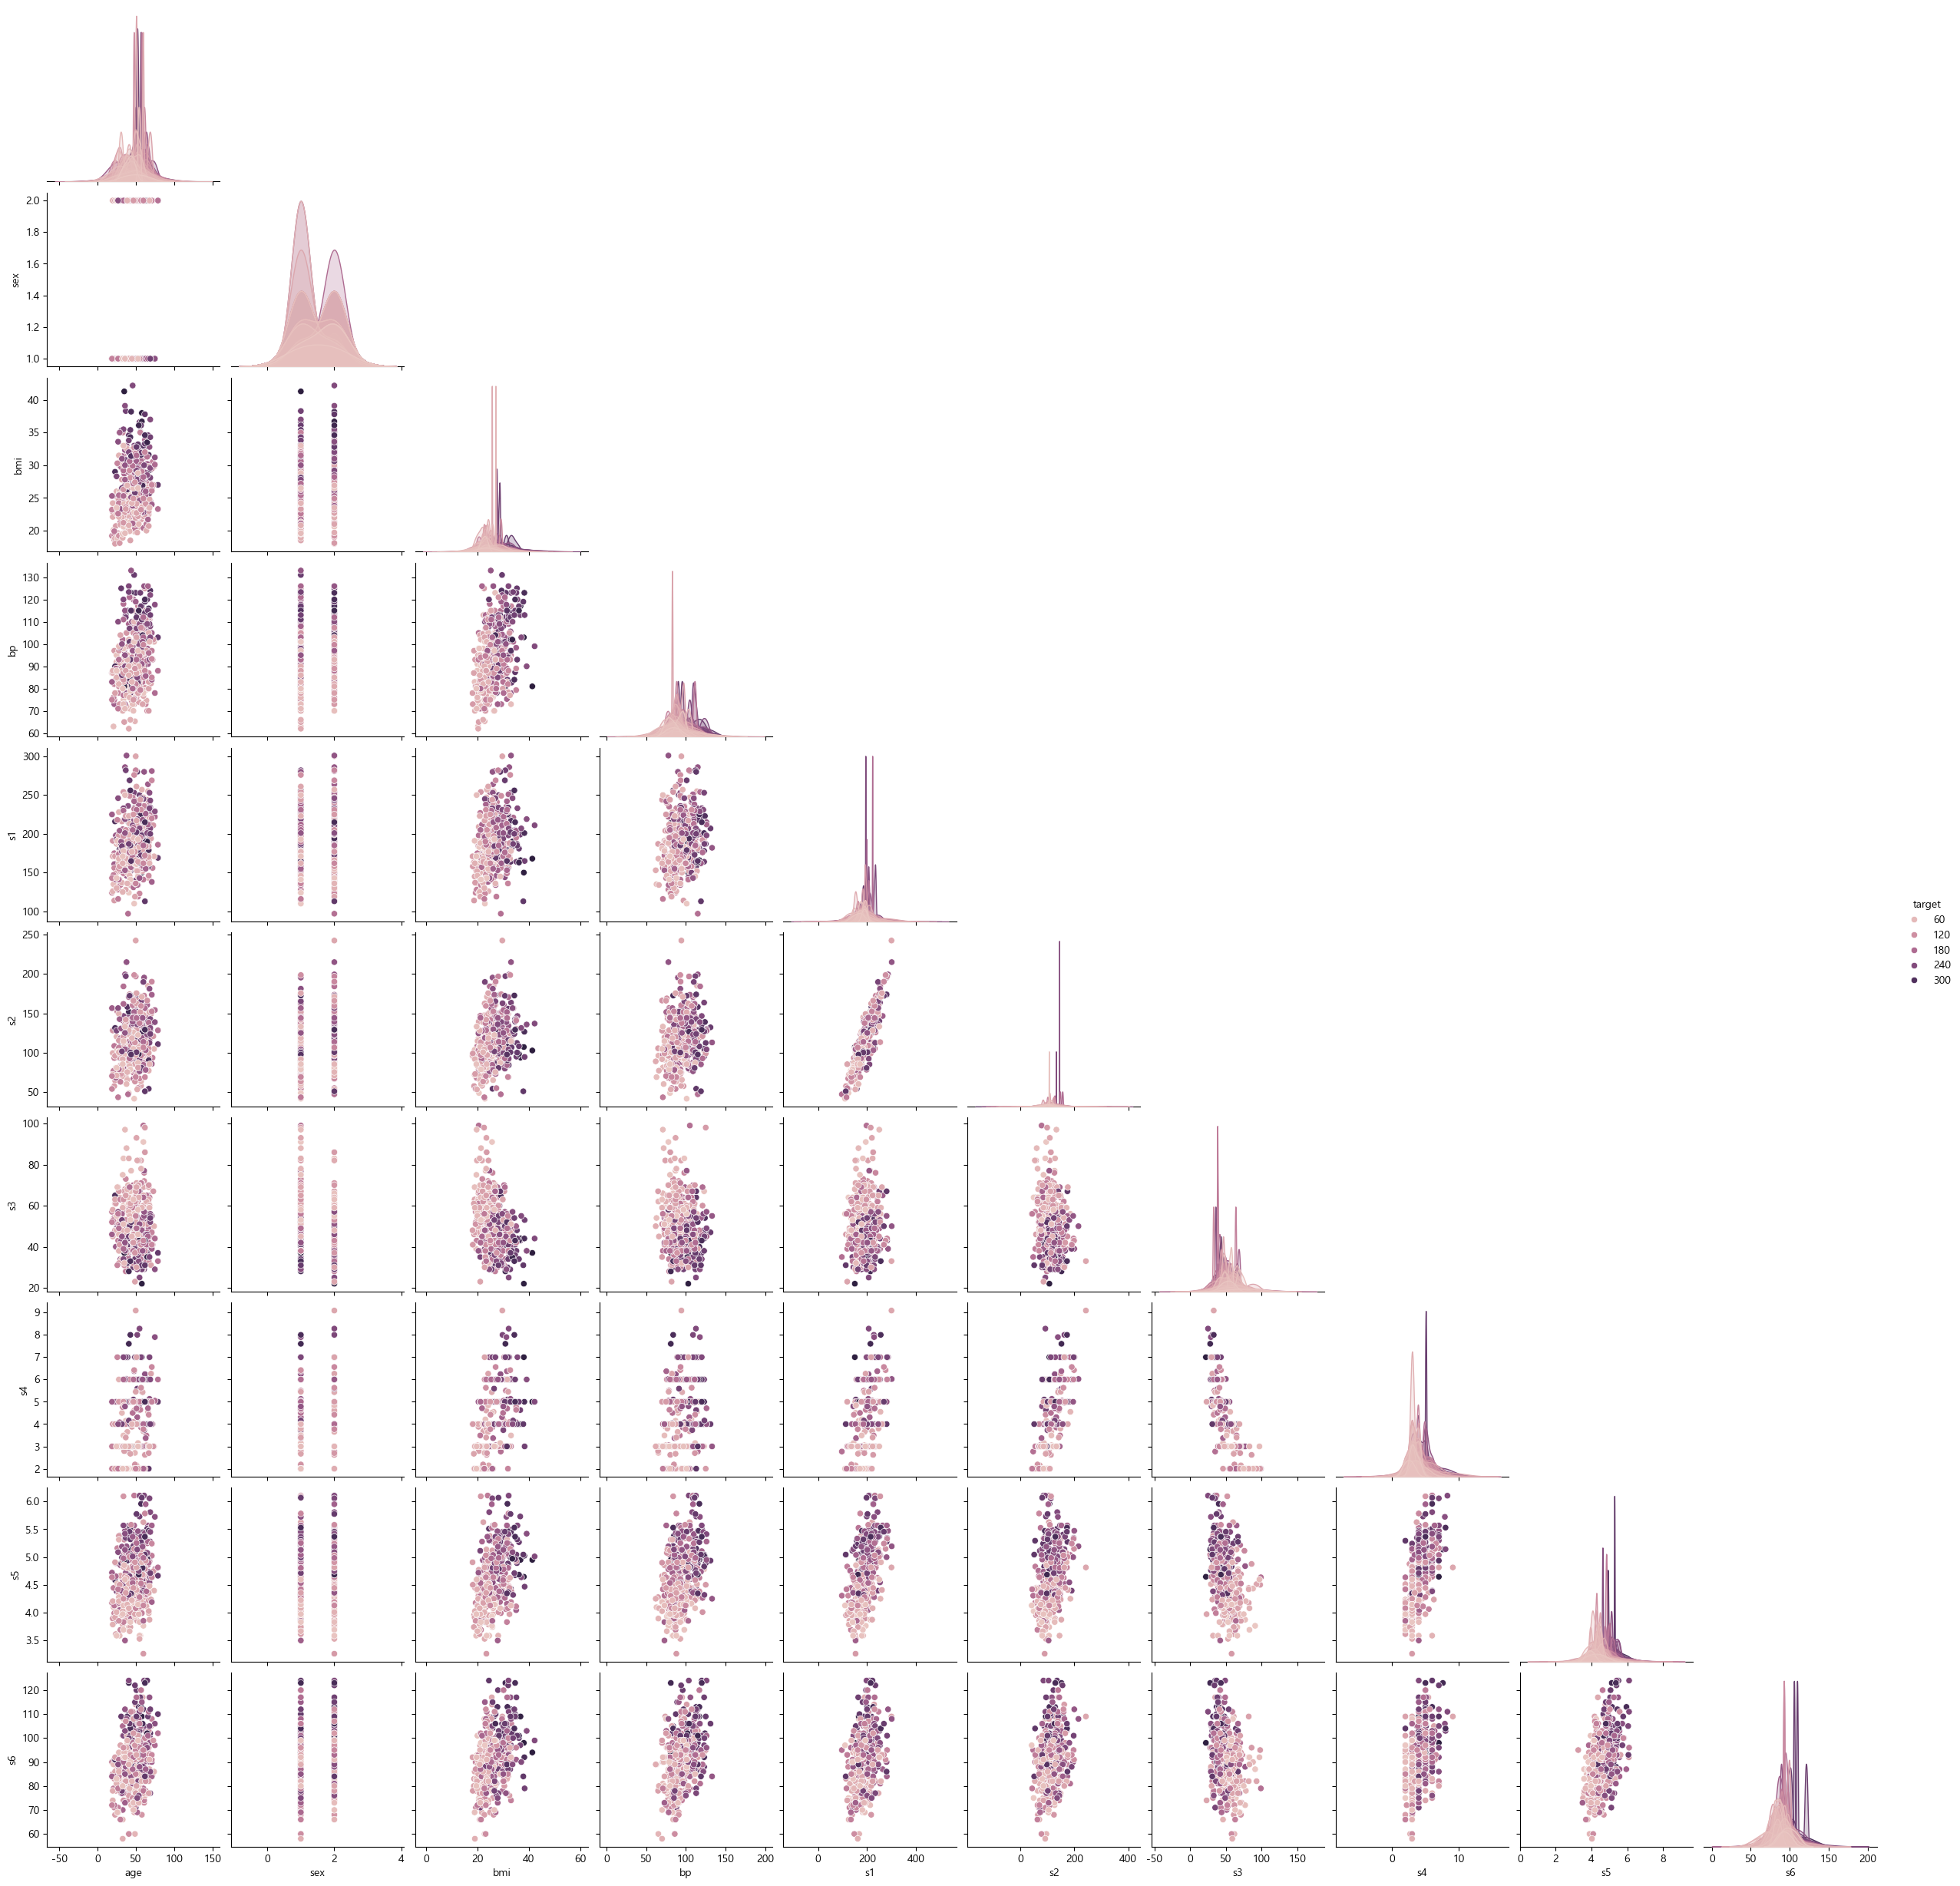

In [62]:
# 오래걸리니까, 가능하신분만 해봅시다.
sns.pairplot(df, hue='target', corner=True)

# 함수 정의

In [260]:
# 모델스코어를 리셋
model_score = []


In [216]:
# 모델 성능 비교하는 함수를 만들어보자.
model_score = []
def 모델성능(model, X_train, X_test, desc = ''):
    model.fit(X_train, y_train)
    
    훈련점수 = model.score(X_train, y_train) 
    시험점수 = model.score( X_test,  y_test)
    
    print(f'{desc}의 훈련 점수는 {훈련점수:.5f}, 테스트 점수는 {시험점수:.5f}')
    model_score.append([desc, '0훈련', 훈련점수])
    model_score.append([desc, '1시험', 시험점수])

# 함수 만드는 구조를 설명
# 인자를 무엇을 할 것인가?
## 변하는 값을 넣어준다
## 인자를 정했으면, 함수를 설계한다.
## 기록할 수 있도록 한다.

In [545]:
def 차트(min=.4, max=.65):
    temp_df = pd.DataFrame(model_score, columns = ['모델', '데이터', 'R2'])
    plt.figure(figsize=(15,5))
    plt.ylim(min,max)
    sns.barplot(temp_df, x = '모델', y = 'R2', hue='데이터', )
    plt.grid(True)

회귀_기본의 훈련 점수는 0.52441, 테스트 점수는 0.47729


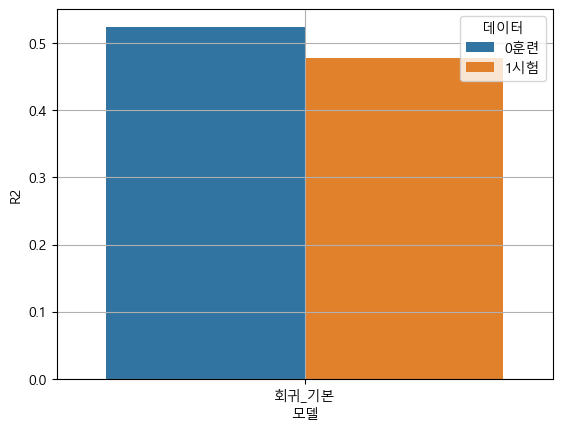

In [262]:
모델성능(lr, X_train, X_test, desc='회귀_기본')
차트()

# 선형회귀 모델링

In [58]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test), lr.score(X_train, y_train)
# 베이스 모델 r2은 테스트 47.72, 훈련 52.44

(0.47728971643226115, 0.5244124363545944)

In [84]:
pd.DataFrame(lr.coef_.reshape(1,-1), columns = df.columns[:-1])

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.106266,-24.94632,5.888084,1.337198,-1.241054,0.793461,0.446046,10.628824,60.096338,0.171387


In [86]:
lr.intercept_ # 상수항

-316.2885807533932

기본모델의 훈련 점수는 0.52441, 테스트 점수는 0.47729


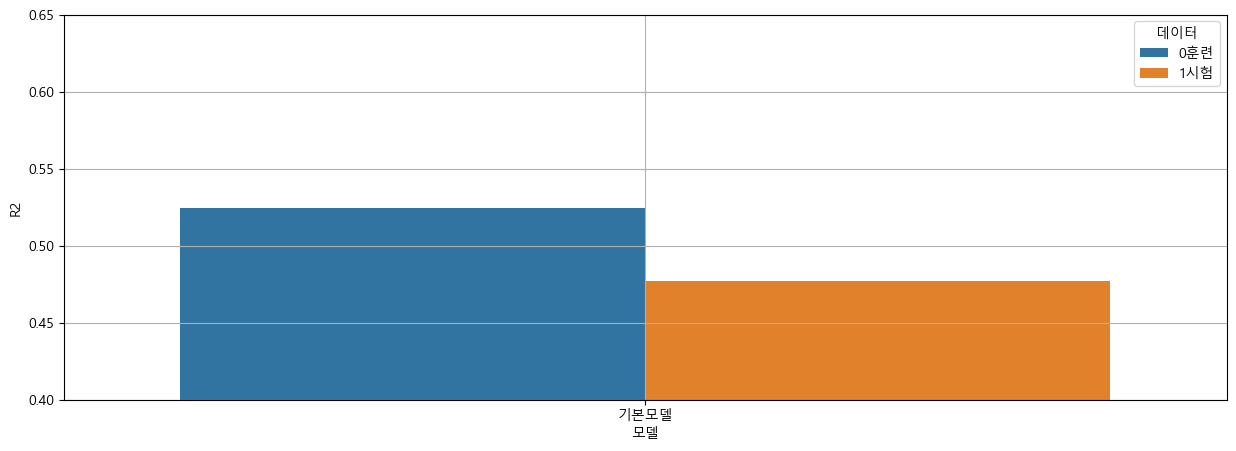

In [490]:
model_score = []
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
모델성능(lr, X_train,X_test, desc='기본모델')
차트()

# 선형회귀에서 비선형 관계를 포착하는 방법

In [121]:
# X2
X_train_x2 = np.hstack([X_train, X_train**2])
X_test_x2 = np.hstack([X_test, X_test**2])


리니어_x2의 훈련 점수는 0.55292, 테스트 점수는 0.48694


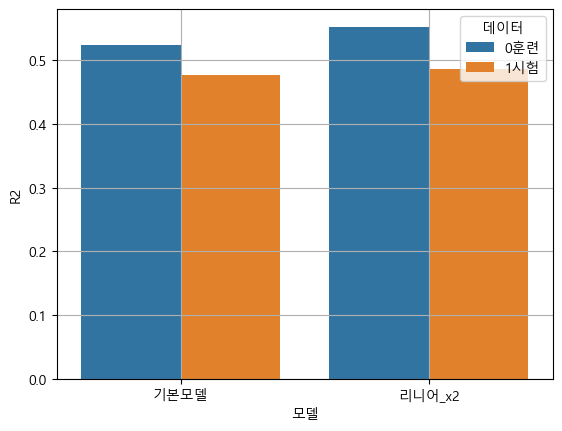

In [266]:
모델성능(lr, X_train_x2, X_test_x2, desc = '리니어_x2')
차트()

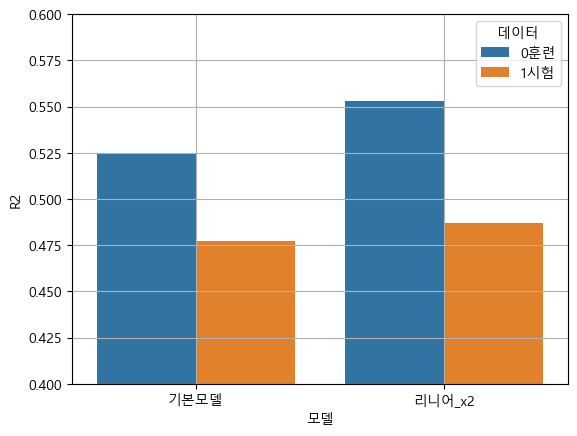

In [272]:
plt.ylim(0.4, 0.6)
차트()

In [143]:
# X3
X_train_x3 = np.hstack([X_train, X_train**2, X_train**3])
X_test_x3  = np.hstack([X_test,  X_test**2,  X_test**3])


리니어_x3의 훈련 점수는 0.56484, 테스트 점수는 0.49526


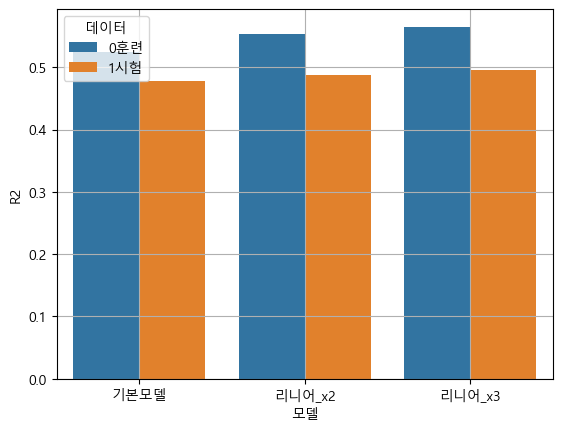

In [274]:
모델성능(lr, X_train_x3, X_test_x3, desc = '리니어_x3')
차트()

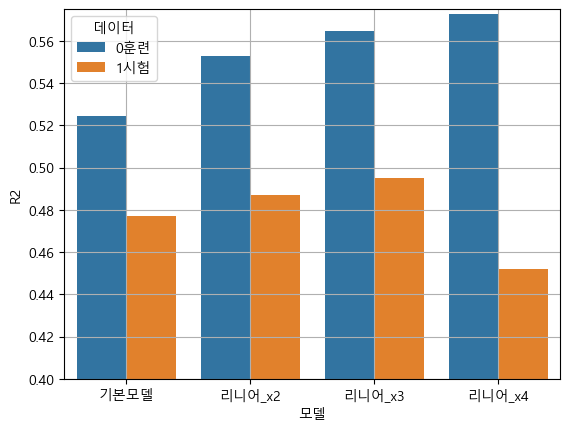

In [288]:
plt.ylim(0.40, 0.575)
차트()

In [145]:
lr.fit(X_train_x3, y_train)
lr.score(X_test_x3, y_test), lr.score(X_train_x3, y_train)

(0.49526180825246036, 0.564844120544862)

리니어_x4의 훈련 점수는 0.57271, 테스트 점수는 0.45185


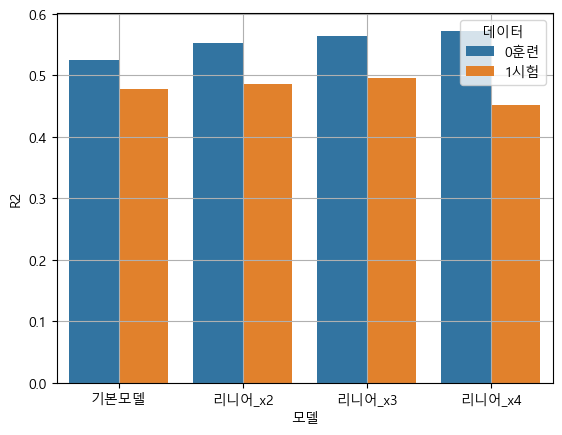

In [282]:
# X4
X_train_x4 = np.hstack([X_train, X_train**2, X_train**3, X_train**4])
X_test_x4  = np.hstack([X_test,  X_test**2,  X_test**3,  X_test**4])
모델성능(lr, X_train_x4, X_test_x4, desc = '리니어_x4')
차트()

In [330]:
# 파이프라인과 폴리노멀 피쳐스
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [334]:
pipe = make_pipeline(PolynomialFeatures(degree = 2),
                     StandardScaler(),
                     LinearRegression())
모델성능(pipe, X_train, X_test, desc = 'poly_d2')

poly_d2의 훈련 점수는 0.60811, 테스트 점수는 0.41298


# 규제
1. 라쏘 회귀
2. 릿지 회귀
3. 엘라스틱 넷

In [337]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

Lasso_base의 훈련 점수는 0.51708, 테스트 점수는 0.46548


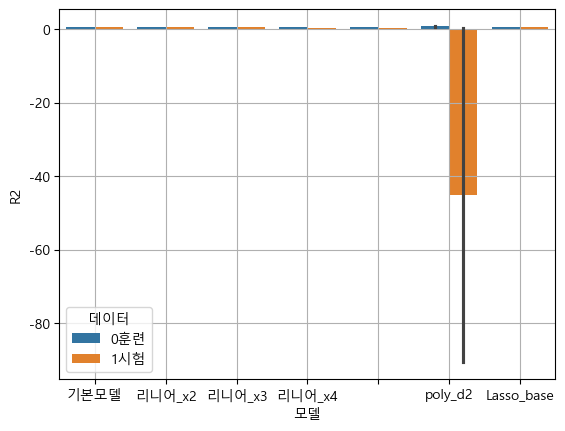

In [339]:
ls = Lasso()
모델성능(ls, X_train, X_test, desc = 'Lasso_base')

In [442]:
pipe = make_pipeline(StandardScaler(), Lasso())
모델성능(pipe, X_train, X_test, desc = 'Lasso_base_ss')

Lasso_base_ss의 훈련 점수는 0.51916, 테스트 점수는 0.48422


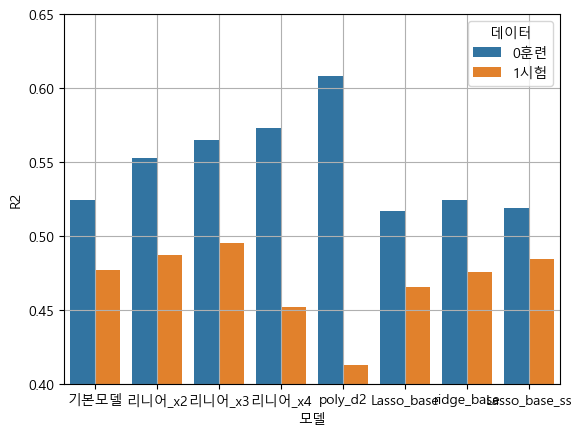

In [444]:
차트()

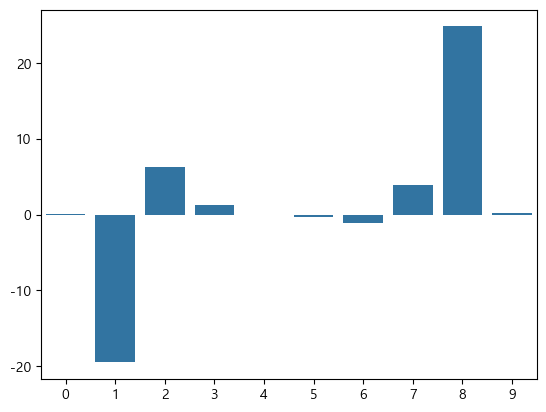

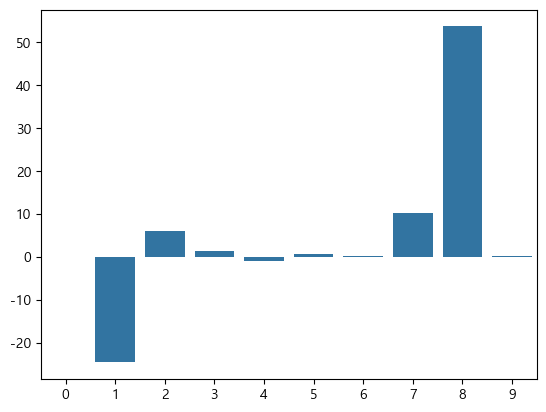

In [436]:
sns.barplot(ls.coef_)
plt.show()
sns.barplot(ridge.coef_)
plt.show()

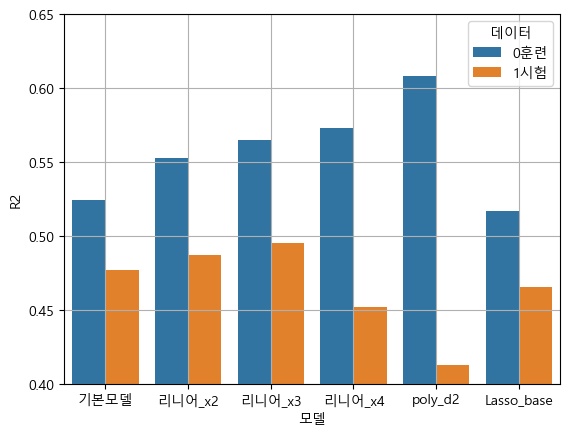

In [388]:
차트()

ridge_base의 훈련 점수는 0.52423, 테스트 점수는 0.47535


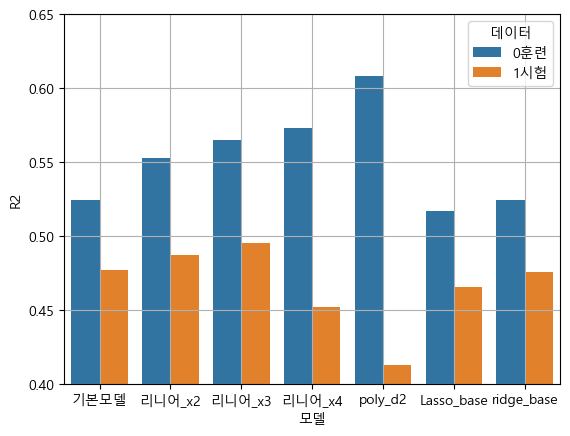

In [428]:
ridge = Ridge()
모델성능(ridge, X_train, X_test, desc = 'ridge_base')

In [452]:
pipe = make_pipeline(StandardScaler(), Ridge())
모델성능(pipe, X_train, X_test, desc = 'Ridge_base_ss')

Ridge_base_ss의 훈련 점수는 0.52410, 테스트 점수는 0.47762


In [476]:
pipe = make_pipeline(PolynomialFeatures(degree=2),
                     StandardScaler(),
                     Ridge())
모델성능(pipe, X_train, X_test, desc = 'Ridge_poly2_ss')

Ridge_poly2_ss의 훈련 점수는 0.57883, 테스트 점수는 0.48397


In [478]:
pipe = make_pipeline(PolynomialFeatures(degree=2),
                     StandardScaler(),
                     Lasso())
모델성능(pipe, X_train, X_test, desc = 'Lasso_poly2_ss')

Lasso_poly2_ss의 훈련 점수는 0.52715, 테스트 점수는 0.47927


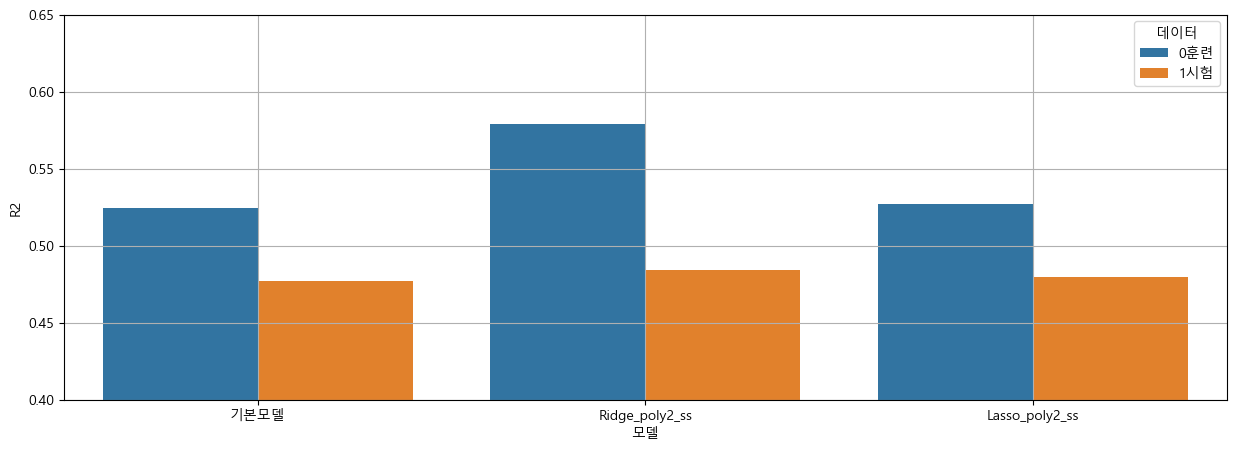

In [480]:
차트()

In [468]:
pipe = make_pipeline(PolynomialFeatures(degree=3),
                     StandardScaler(),
                     Ridge())
모델성능(pipe, X_train, X_test, desc = 'Ridge_poly3_ss')

Ridge_poly3_ss의 훈련 점수는 0.61508, 테스트 점수는 0.46340


In [470]:
pipe = make_pipeline(PolynomialFeatures(degree=3),
                     StandardScaler(),
                     Lasso())
모델성능(pipe, X_train, X_test, desc = 'Lasso_poly3_ss')

Lasso_poly3_ss의 훈련 점수는 0.53560, 테스트 점수는 0.48401


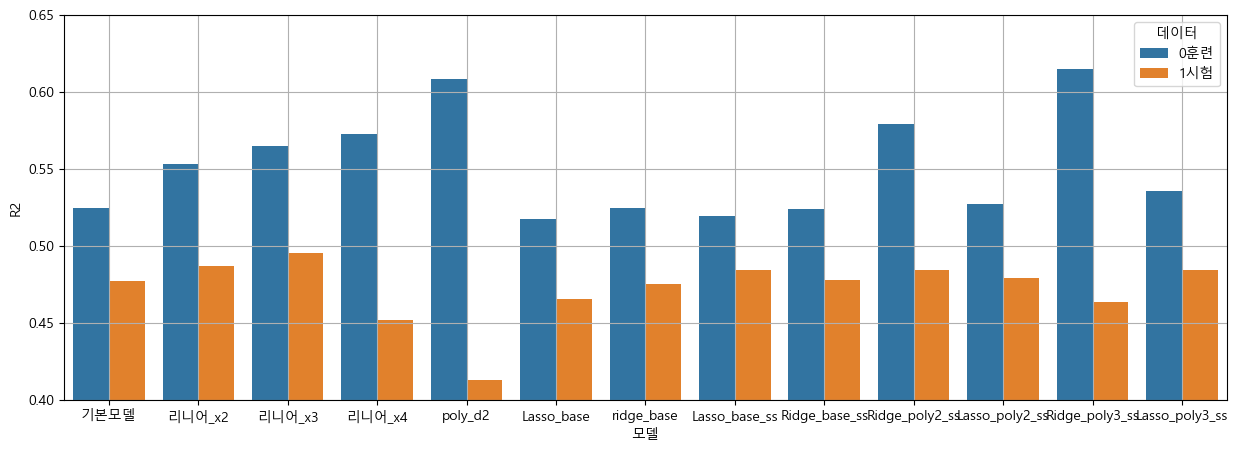

In [472]:
차트()

# 스케일러를 minmax를 사용한 경우는?


In [482]:
from sklearn.preprocessing import MinMaxScaler

In [494]:
pipe = make_pipeline(PolynomialFeatures(degree=2),
                     StandardScaler(), # t스탠다드
                     Lasso())
모델성능(pipe, X_train, X_test, desc = 'Lasso_poly2_ss')

Lasso_poly2_ss의 훈련 점수는 0.52715, 테스트 점수는 0.47927


In [496]:
pipe = make_pipeline(PolynomialFeatures(degree=2),
                     MinMaxScaler(), # 민맥스
                     Lasso())
모델성능(pipe, X_train, X_test, desc = 'Lasso_poly2_mm')

Lasso_poly2_mm의 훈련 점수는 0.50871, 테스트 점수는 0.48931


In [498]:
pipe = make_pipeline(PolynomialFeatures(degree=2),
                     StandardScaler(),
                     Ridge())
모델성능(pipe, X_train, X_test, desc = 'Ridge_poly2_ss')

Ridge_poly2_ss의 훈련 점수는 0.57883, 테스트 점수는 0.48397


In [500]:
pipe = make_pipeline(PolynomialFeatures(degree=2),
                     MinMaxScaler(),
                     Ridge())
모델성능(pipe, X_train, X_test, desc = 'Ridge_poly2_mm')

Ridge_poly2_mm의 훈련 점수는 0.53913, 테스트 점수는 0.49019


In [504]:
pipe = make_pipeline(PolynomialFeatures(degree=2),
                     MinMaxScaler(),
                     ElasticNet())
모델성능(pipe, X_train, X_test, desc = 'ElasticNet_poly2_mm')
pipe = make_pipeline(PolynomialFeatures(degree=2),
                     StandardScaler(),
                     ElasticNet())
모델성능(pipe, X_train, X_test, desc = 'ElasticNet_poly2_ss')

ElasticNet_poly2_mm의 훈련 점수는 0.34962, 테스트 점수는 0.34757
ElasticNet_poly2_ss의 훈련 점수는 0.52105, 테스트 점수는 0.47715


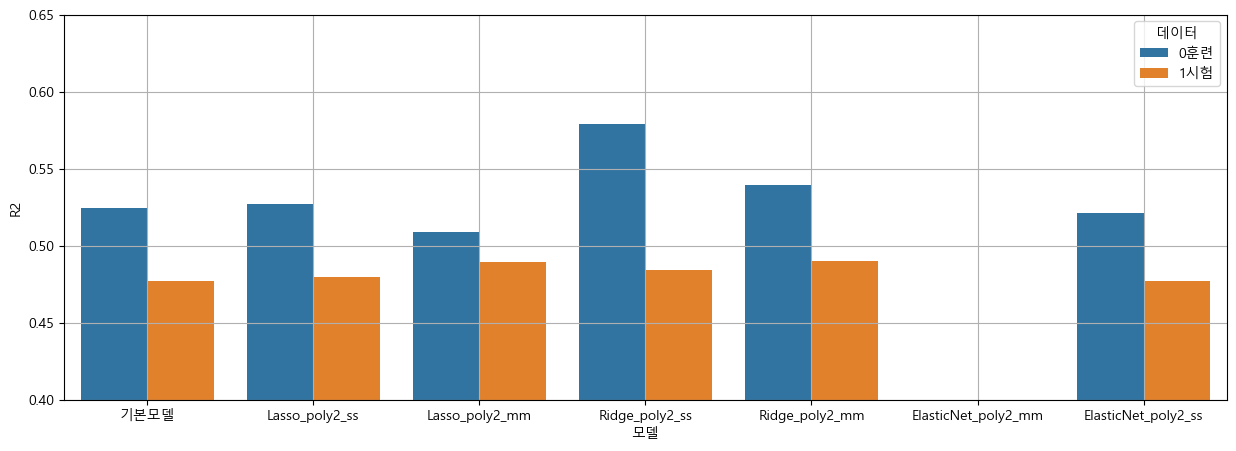

In [506]:
차트()

# 트리모형

In [547]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=3)
모델성능(dt, X_train, X_test, desc = 'DecisionTree_dep_3')


DecisionTree_dep_3의 훈련 점수는 0.52532, 테스트 점수는 0.33002


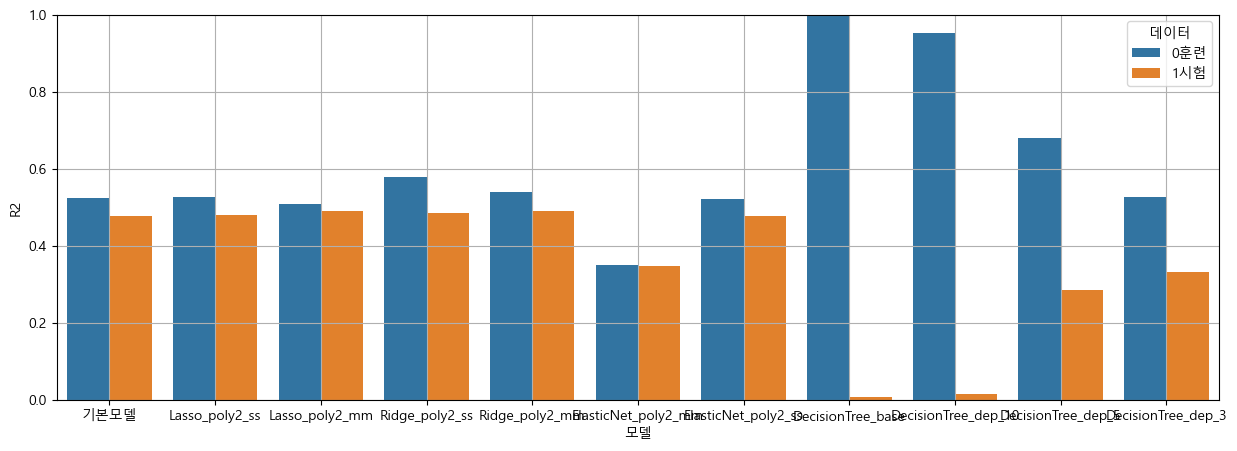

In [549]:

차트(min=0, max=1)

In [526]:
dt.get_depth()

17

In [555]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
모델성능(rf, X_train, X_test, desc = 'randomforest')


randomforest의 훈련 점수는 0.92173, 테스트 점수는 0.47390


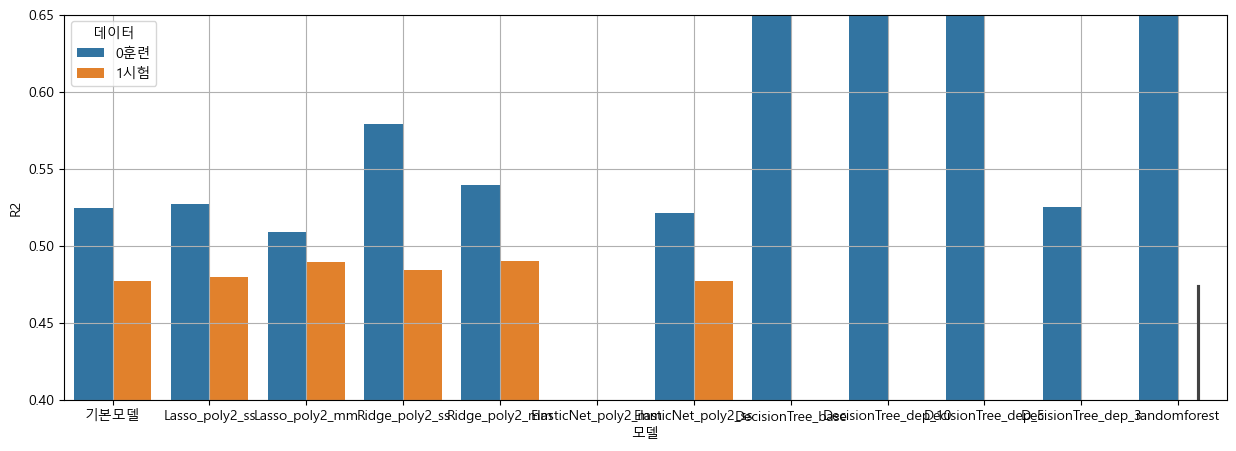

In [557]:
차트()

In [559]:
from sklearn.ensemble import GradientBoostingRegressor
rf = GradientBoostingRegressor()
모델성능(rf, X_train, X_test, desc = 'gb')


gb의 훈련 점수는 0.85739, 테스트 점수는 0.43799


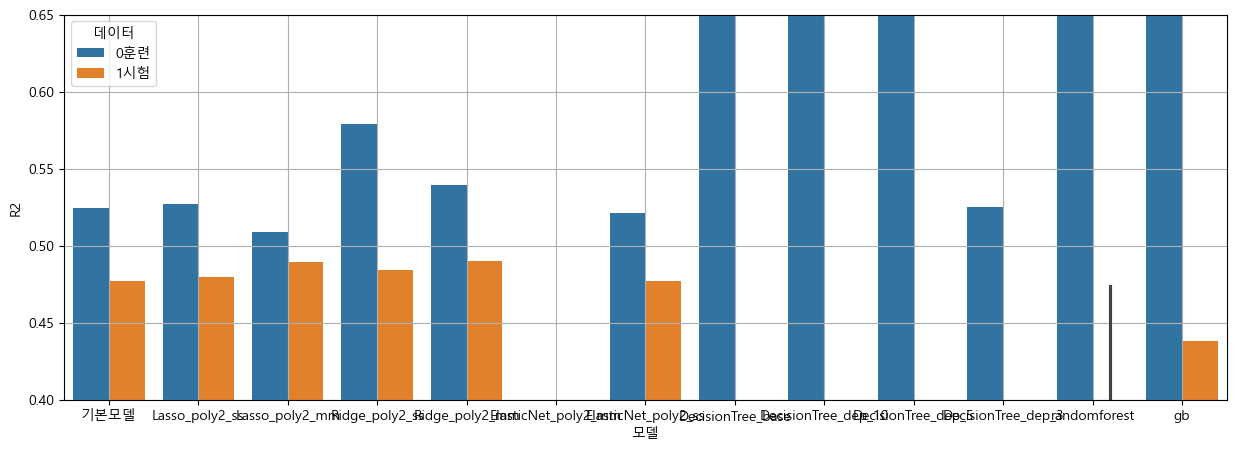

In [561]:
차트()

In [565]:
from sklearn.ensemble import GradientBoostingRegressor
pipe = make_pipeline(MinMaxScaler(), GradientBoostingRegressor())
모델성능(pipe, X_train, X_test, desc = 'gb')


gb의 훈련 점수는 0.85739, 테스트 점수는 0.43108


# 서포트 벡터

# 최근접이웃 KNN Regressor